In [1]:
#Import audio file 
import wave

In [2]:
InpAudio = wave.open("InputAudio.wav") 

In [3]:
from scipy.io import wavfile
samplerate, InputData = wavfile.read('InputAudio.wav')

In [4]:
print(samplerate, len(InputData))

16000 960487


# Downsampling audio from 44.1khz to 16khz

In [5]:
!pip install librosa

In [6]:
import librosa 
DSinputAudioFile, s = librosa.load('InputAudioFile.wav', sr=16000)
DSinputAudioFile

import soundfile
soundfile.write("DSinputAudioFile.wav",DSinputAudioFile,s)

In [7]:
!pip install pydub

In [8]:
from pydub.playback import play
from pydub import AudioSegment

song = AudioSegment.from_wav("DSinputAudioFile.wav")
play(song)

C:\Users\jaybh\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Using Pydub for making chunks of data

In [9]:
!pip3 install pydub
!pip install pydub

In [10]:
from pydub import AudioSegment
from pydub.utils import make_chunks

InputAudioFile = AudioSegment.from_file("DSinputAudioFile.wav" , "wav") 
chunk_length_ms = 10000 # pydub calculates in millisec so 2000 is 2 seconds
chunks = make_chunks(InputAudioFile, chunk_length_ms) #Make chunks of one sec

#Export all of the individual chunks as wav files

for i, chunk in enumerate(chunks):
    chunk_name = "chunk{0}.wav".format(i)
    print("exporting", chunk_name)
    chunk.export(chunk_name, format="wav")

exporting chunk0.wav
exporting chunk1.wav


In [11]:
from scipy.io import wavfile
ChunkSR, ChunkIpData = wavfile.read('chunk0.wav')

In [12]:
len(ChunkIpData)

160000

In [13]:
ChunkSR

16000

# Applying DWT to the audio chunk

In [14]:
import pywt

LowFreq, HighFreq = pywt.dwt(ChunkIpData, 'bior6.8','per');
y = pywt.idwt(LowFreq, HighFreq, 'bior6.8', 'per')


wavfile.write('LowFreq.wav',ChunkSR, LowFreq);

wavfile.write('HighFreq.wav', ChunkSR, HighFreq);

# Displaying audio file after DWT

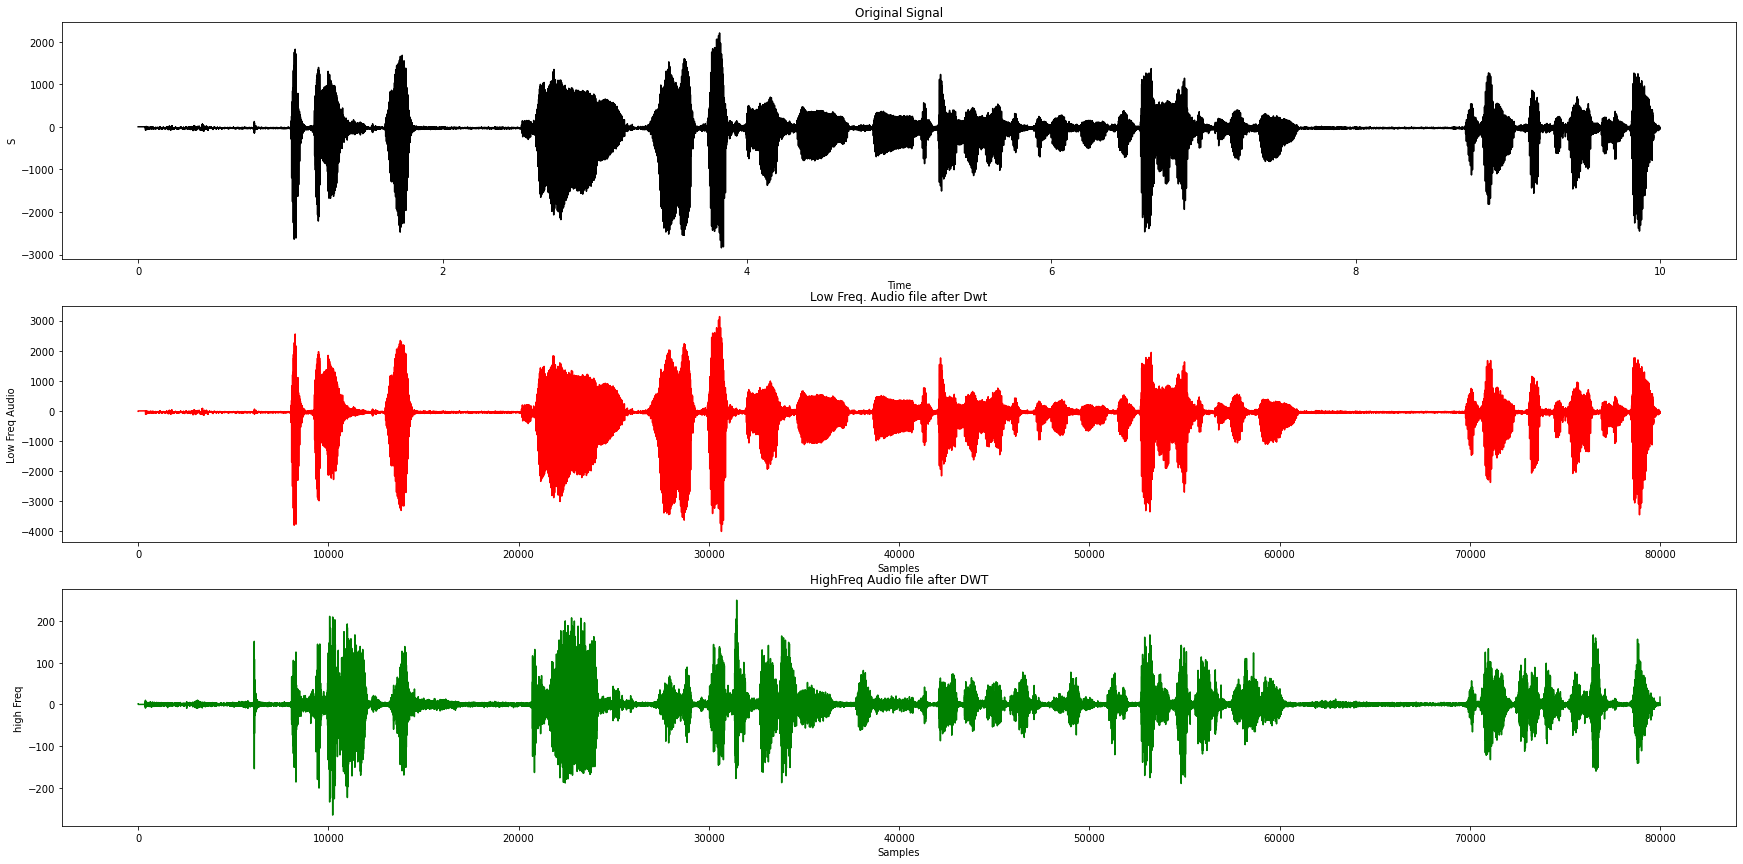

In [15]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(len(ChunkIpData)) / float(ChunkSR);

plt.figure(figsize=(30, 20));

plt.subplot(4, 1, 1)
plt.plot(t, ChunkIpData, color='k');
plt.xlabel('Time');
plt.ylabel('S');
plt.title('Original Signal');

plt.subplot(4, 1, 2)
plt.plot(LowFreq, color='r');
plt.xlabel('Samples');
plt.ylabel('Low Freq Audio');
plt.title('Low Freq. Audio file after Dwt');

plt.subplot(4, 1, 3)
plt.plot(HighFreq, color='g');
plt.xlabel('Samples');
plt.ylabel('high Freq');
plt.title('HighFreq Audio file after DWT');

plt.show()